<a href="https://colab.research.google.com/github/sparks-baird/mat_discover/blob/main/examples/structurally-aware-mat-discover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DiSCoVeR 2.0

A structurally-aware material discovery framework.

## Installation

joblib==1.1.0 temporary (no longer needed when hdbscan > 0.8.28).

In [1]:
try:
    import google.colab

    IN_COLAB = True
    %pip install mat_discover
except:
    IN_COLAB = False

In [2]:
dummy = False  # @param {type:"boolean"}

## Imports

In [3]:
import numpy as np
import pandas as pd
from mat_discover.mat_discover_ import (
    Discover,
    M3GNetWrapper,
    MEGNetWrapper,
    CrabNetPretendCrystalWrapper,
)
from matbench.bench import MatbenchBenchmark

## 1. Data

The "index" column helps with knowing where repeat formulas came from. `mat_discover` takes into account when repeat formulas are present in the training dataset (i.e. when calculating the train contribution to log validation density). However, this isn't addressed here; we assume each formula is unique and ignore any repeats.

In [4]:
mb = MatbenchBenchmark(autoload=True, subset=["matbench_log_kvrh"])

2022-12-17 12:59:12 INFO     Initialized benchmark 'matbench_v0.1' with 1 tasks: 
['matbench_log_kvrh']


INFO:matbench:Initialized benchmark 'matbench_v0.1' with 1 tasks: 
['matbench_log_kvrh']


In [6]:
task = list(mb.tasks)[0]
fold = 0
train_inputs, train_outputs = task.get_train_and_val_data(fold)
test_inputs, test_outputs = task.get_test_data(fold, include_target=True)
if dummy:
    train_inputs = train_inputs.head(10)
    train_outputs = train_outputs.head(10)
    test_inputs = test_inputs.head(5)
    test_outputs = test_outputs.head(5)
train_df = pd.concat((train_inputs, train_outputs), axis=1).rename(
    columns={train_outputs.name: "target"}
)
val_df = pd.concat((test_inputs, test_outputs), axis=1).rename(
    columns={test_outputs.name: "target"}
)
train_df

,structure,target
mbid,,
mb-log-kvrh-00001,"[[0. 0. 0.] Ca, [1.37728887 1.57871271 3.73949...",1.707570
mb-log-kvrh-00002,"[[3.14048493 1.09300401 1.64101398] Mg, [0.625...",1.633468
mb-log-kvrh-00003,"[[ 2.06884519 2.40627241 -0.45891585] Si, [1....",1.908485
mb-log-kvrh-00004,"[[2.06428082 0. 2.06428082] Pd, [0. ...",2.117271
mb-log-kvrh-00005,"[[3.09635262 1.0689416 1.53602403] Mg, [0.593...",1.690196
...,...,...
mb-log-kvrh-10982,"[[ 1.60692088 1.90738026 -1.59486282] Al, [0....",1.851258
mb-log-kvrh-10983,"[[0. 0. 0.] Rh, [3.2029368 3.2029368 2.09459...",1.778151
mb-log-kvrh-10984,"[[-1.51157821 4.4173925 1.21553922] Mg, [3....",1.724276


In [7]:
disc = Discover(
    dummy_run=dummy,
    target_unit="log(GPa)",
    use_structure=True,
    # regressor=M3GNetWrapper(epochs=100),
    regressor=CrabNetPretendCrystalWrapper(epochs=300),
)


Model architecture: out_dims, d_model, N, heads
3, 512, 3, 4
Running on compute device: cuda:0


In [8]:
disc.fit(train_df)

Model size: 11987206 parameters



Generating EDM: 100%|██████████| 7031/7031 [00:00<00:00, 123347.95formulae/s]


loading data with up to 5 elements in the formula
training with batchsize 512 (2**9.000)


Generating EDM: 100%|██████████| 1758/1758 [00:00<00:00, 97662.10formulae/s]

loading data with up to 5 elements in the formula
stepping every 140 training passes, cycling lr every 10 epochs
checkin at 20 epochs to match lr scheduler


Epoch: 0/300 --- train mae: 0.283 val mae: 0.29
Epoch: 19/300 --- train mae: 0.0808 val mae: 0.098
Epoch: 39/300 --- train mae: 0.0587 val mae: 0.0855
Epoch: 59/300 --- train mae: 0.0458 val mae: 0.0823
Epoch: 79/300 --- train mae: 0.0368 val mae: 0.0816
Epoch: 99/300 --- train mae: 0.0307 val mae: 0.0815
Epoch: 119/300 --- train mae: 0.0266 val mae: 0.0817
Epoch: 139/300 --- train mae: 0.0237 val mae: 0.0816
Epoch: 159/300 --- train mae: 0.0214 val mae: 0.0821
Epoch 179 failed to improve.
Discarded: 1/3 weight updates
Epoch: 179/300 --- train mae: 0.0195 val mae: 0.0832
Epoch 199 failed to improve.
Discarded: 2/3 weight updates
Epoch: 199/300 --- train mae: 0.0179 val mae: 0.0823
Epoch 219 failed to improve.
Discarded: 3/3 weight updates
Epoch: 219/300 --- train mae: 0.0164 val mae: 0.0825
Discarded: 3/3weight updates, early-stopping now
Saving network (UnnamedModel) to models\trained_models\UnnamedModel.pth
[train-regressor]
Elapsed: 445.28859



In [9]:
score = disc.predict(val_df, umap_random_state=42)

Generating EDM: 100%|██████████| 8789/8789 [00:00<00:00, 165831.76formulae/s]


loading data with up to 5 elements in the formula


Generating EDM: 100%|██████████| 2198/2198 [00:00<00:00, 104519.98formulae/s]


loading data with up to 5 elements in the formula
val RMSE:  0.14205581702703673


C:\Users\sterg\Documents\GitHub\sparks-baird\mat_discover\mat_discover\mat_discover_.py:624: UserWarning:

return_uncertainty not a valid kwarg for regressor: <mat_discover.mat_discover_.CrabNetPretendCrystalWrapper object at 0x00000208FBF8D850>. Setting self.train_sigma as array of zeros (note the uncertainty values are for user convenience; they are not directly used).

c:\Users\sterg\Miniconda3\envs\mat-discover\lib\site-packages\numpy\core\fromnumeric.py:3474: RuntimeWarning:

Mean of empty slice.

c:\Users\sterg\Miniconda3\envs\mat-discover\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning:

invalid value encountered in double_scalars



[fit-novelty-learner]
Elapsed: 4774.4396



c:\Users\sterg\Miniconda3\envs\mat-discover\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



[fit-UMAP]
Elapsed: 67.26614



c:\Users\sterg\Miniconda3\envs\mat-discover\lib\site-packages\umap\umap_.py:1780: UserWarning:

using precomputed metric; inverse_transform will be unavailable



[fit-vis-UMAP]
Elapsed: 29.594

[DensMAP]
Elapsed: 96.86014

[HDBSCAN*]
Elapsed: 0.183

[pdf-summation]
Elapsed: 13.661

[gridded-pdf-summation]
Elapsed: 13.832

[train-val-pdf-summation]
Elapsed: 3.544

[nearest-neighbor-properties]
Elapsed: 5.897



c:\Users\sterg\Miniconda3\envs\mat-discover\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




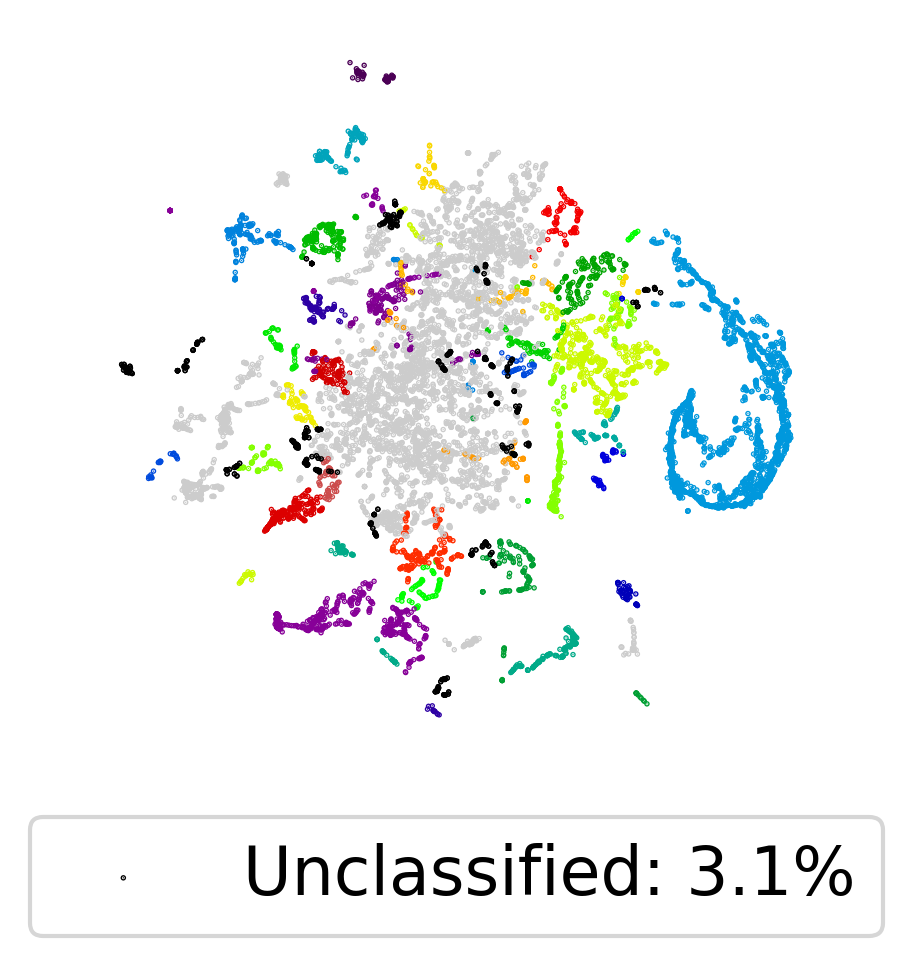

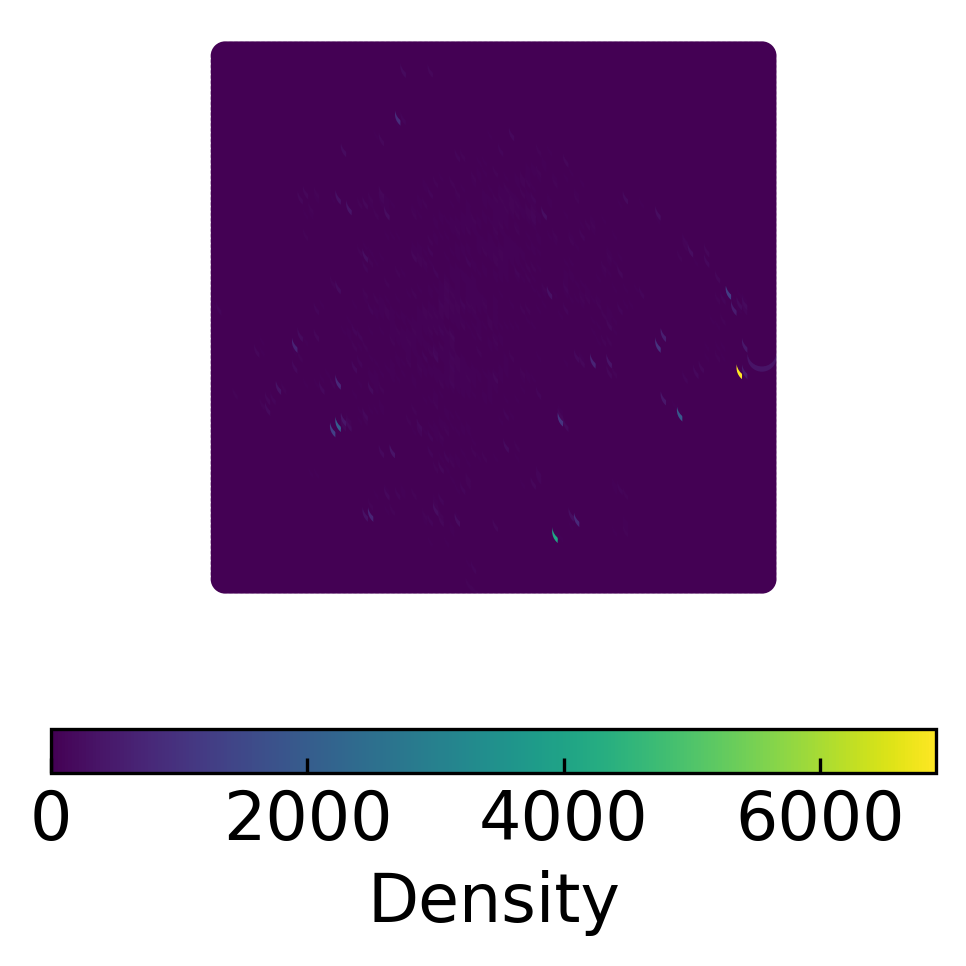

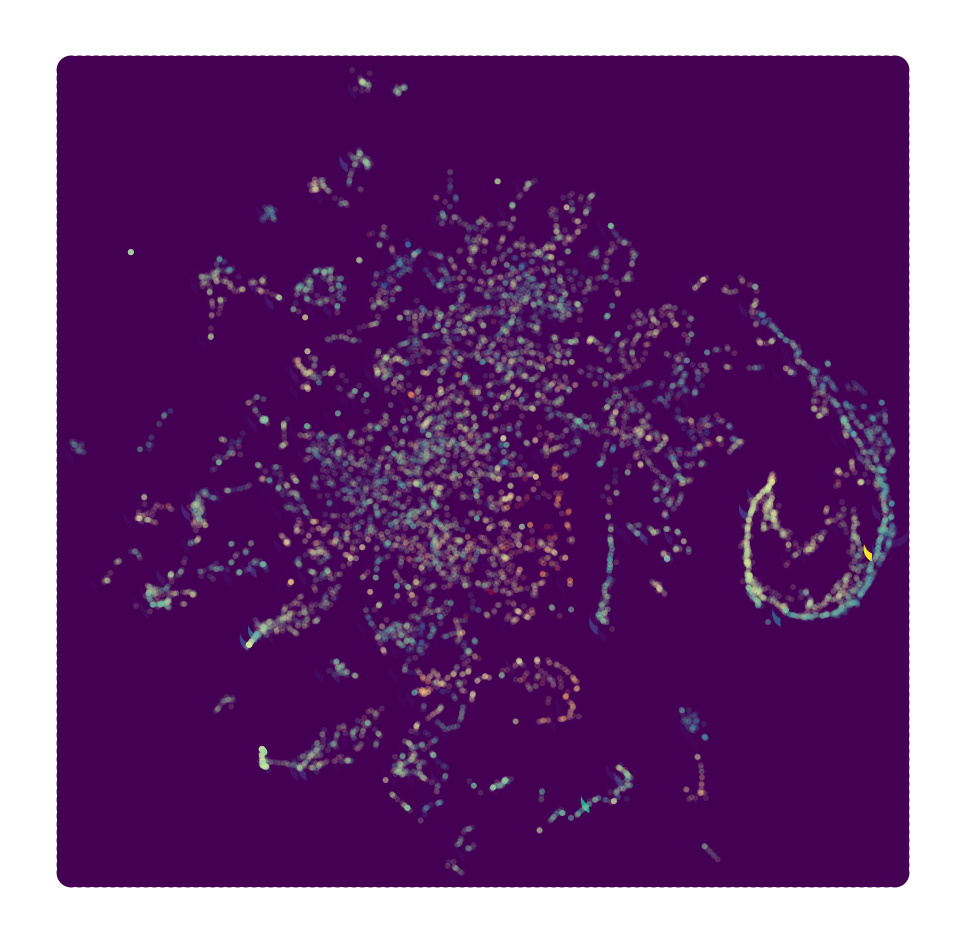

C:\Users\sterg\Documents\GitHub\sparks-baird\mat_discover\mat_discover\mat_discover_.py:1467: UserWarning:

Skipping group cross-validation plot



In [10]:
disc.plot()

In [15]:
from os import path
from mat_discover.utils.pareto import pareto_plot

x = "DensMAP Dim. 1"
y = "DensMAP Dim. 2"

formulas = disc.all_inputs.apply(lambda s: s.composition.reduced_formula)
spg_info = disc.all_inputs.apply(lambda s: s.get_space_group_info())
spg_str = spg_info.apply(lambda s: s[0])
spg_num = spg_info.apply(lambda s: s[1])
num_sites = disc.all_inputs.apply(lambda s: s.num_sites)

targ_df = pd.DataFrame(
    {
        x: disc.std_emb[:, 0],
        y: disc.std_emb[:, 1],
        "target": disc.all_target,
        "spg_num": spg_num,
        "spg_str": spg_str,
        "formula": formulas,
        "num_sites": num_sites,
        "log10_num_sites": np.log10(num_sites),
        disc.input_type: disc.all_inputs,
    }
)

In [12]:
fig = pareto_plot(
    targ_df,
    x=x,
    y=y,
    color="spg_num",
    fpath=path.join(disc.figure_dir, "px-spg-scatter"),
    pareto_front=False,
    parity_type=None,
    color_unit=None,
    use_plotly_offline=disc.use_plotly_offline,
    hover_data=["formula", "spg_num", "spg_str", "num_sites"],
)

In [19]:
fig, _ = pareto_plot(
    targ_df,
    x=x,
    y=y,
    color="log10_num_sites",
    fpath=path.join(disc.figure_dir, "px-num-sites-scatter"),
    pareto_front=False,
    parity_type=None,
    color_unit=None,
    use_plotly_offline=disc.use_plotly_offline,
    hover_data=["formula", "spg_num", "spg_str", "num_sites"],
)
fig.update_layout(
    coloraxis_colorbar=dict(
        title="num_sites",
        tickvals=[np.log10(1), np.log10(10), np.log10(100), np.log10(200)],
        ticktext=["1", "10", "100", "200"],
    ),
    coloraxis_showscale=True,
)

In [14]:
fig = pareto_plot(
    targ_df,
    x=x,
    y=y,
    color="target",
    fpath=path.join(disc.figure_dir, "px-num-sites-scatter"),
    pareto_front=False,
    parity_type=None,
    color_unit=None,
    use_plotly_offline=disc.use_plotly_offline,
    hover_data=["formula", "spg_num", "spg_str", "num_sites"],
)